# Algo-4(Multiple Non Linear Regression)

# Step - 1 : Business Problem Understanding

- **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

# Step - 2 : Data Understanding
**Load Data & Understand every variable**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


- **Dataset Understnading**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [29]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [31]:
continuous = ['TV', 'radio', 'newspaper', 'sales']

- **Exploratory Data Analysis**

In [33]:
df[continuous].describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


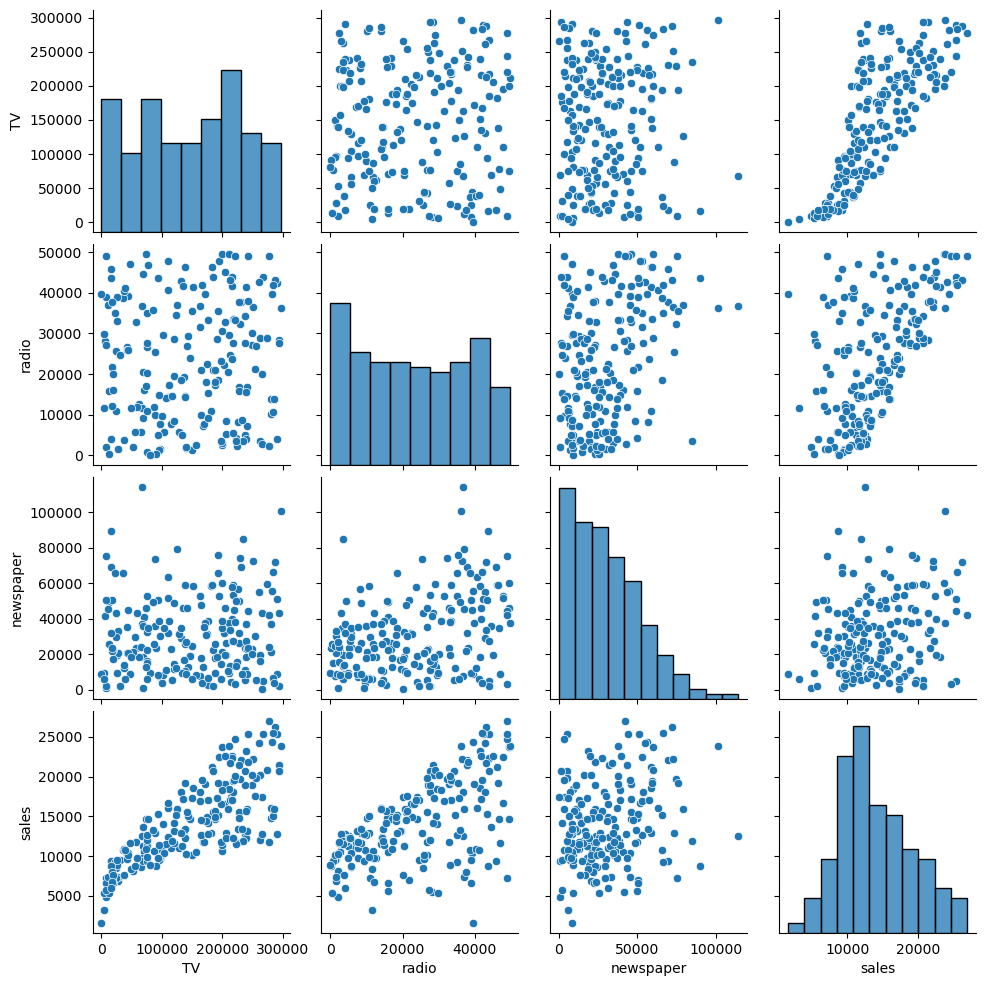

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
df[continuous].corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- The relation between ouput varaible and input variable should be high.
- The higher the value the stronger the correlation, better accuracy
- if any input variable has correlation less than 0.2 with output variable, then that input variable should be dropped
- The relation between any two independent variables should be low
- **If the correlation between any 2 independent variables is >=0.5, then it is called as colinearity problem**
- **Solution :** drop 1 out of 2

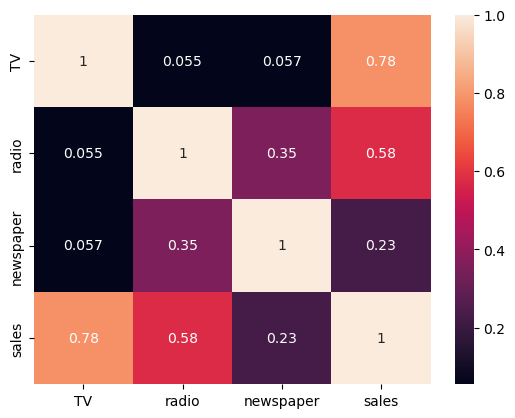

In [39]:
sns.heatmap(df[continuous].corr(), annot=True)
plt.show()

# Only for Multiple Regression : >1 input

- **input & input** : Low corelation (correct)

                  : High (colinearity problem)

                  : Multiple Pairs having colinerity problem (Multicolinearity Problem)

Solution for Colinearity Problem : drop 1 of them

Which column has to be drop : if any column repeats in multi-colinearity : drop that column



- **input & output** : high corelation (correct)

                   : Low corelation (problem) [What happens? : Accuracy will be less]

output & output : NA (why? : we dont have 2 output variables to check corelation)

In [41]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [43]:
df[['TV', 'radio', 'newspaper', 'sales']].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Step-3: Data Preprocessingg

- **Data Cleaning**

In [ ]:
# For this Dataset no Data Cleaning required

- **Data Wrangling**

In [ ]:
# For this dataset no encoding required

- **X&y**

In [45]:
X=df[["TV","radio","newspaper"]]

y=df ['sales']

- **Train-Test Split**

In [58]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [60]:
X_train

,TV,radio,newspaper
190,39500,41100,5800
7,120200,19600,11600
26,142900,29300,12600
138,43000,25900,20500
58,210800,49600,37700
...,...,...,...
113,209600,20600,10700
64,131100,42800,28900
15,195400,47700,52900
125,87200,11800,25900


# Step - 4 : Modeling - Polynomial Regression
- Increasing to higher degree of input variables & applying Linear Regressions

- **For Degree of 2**
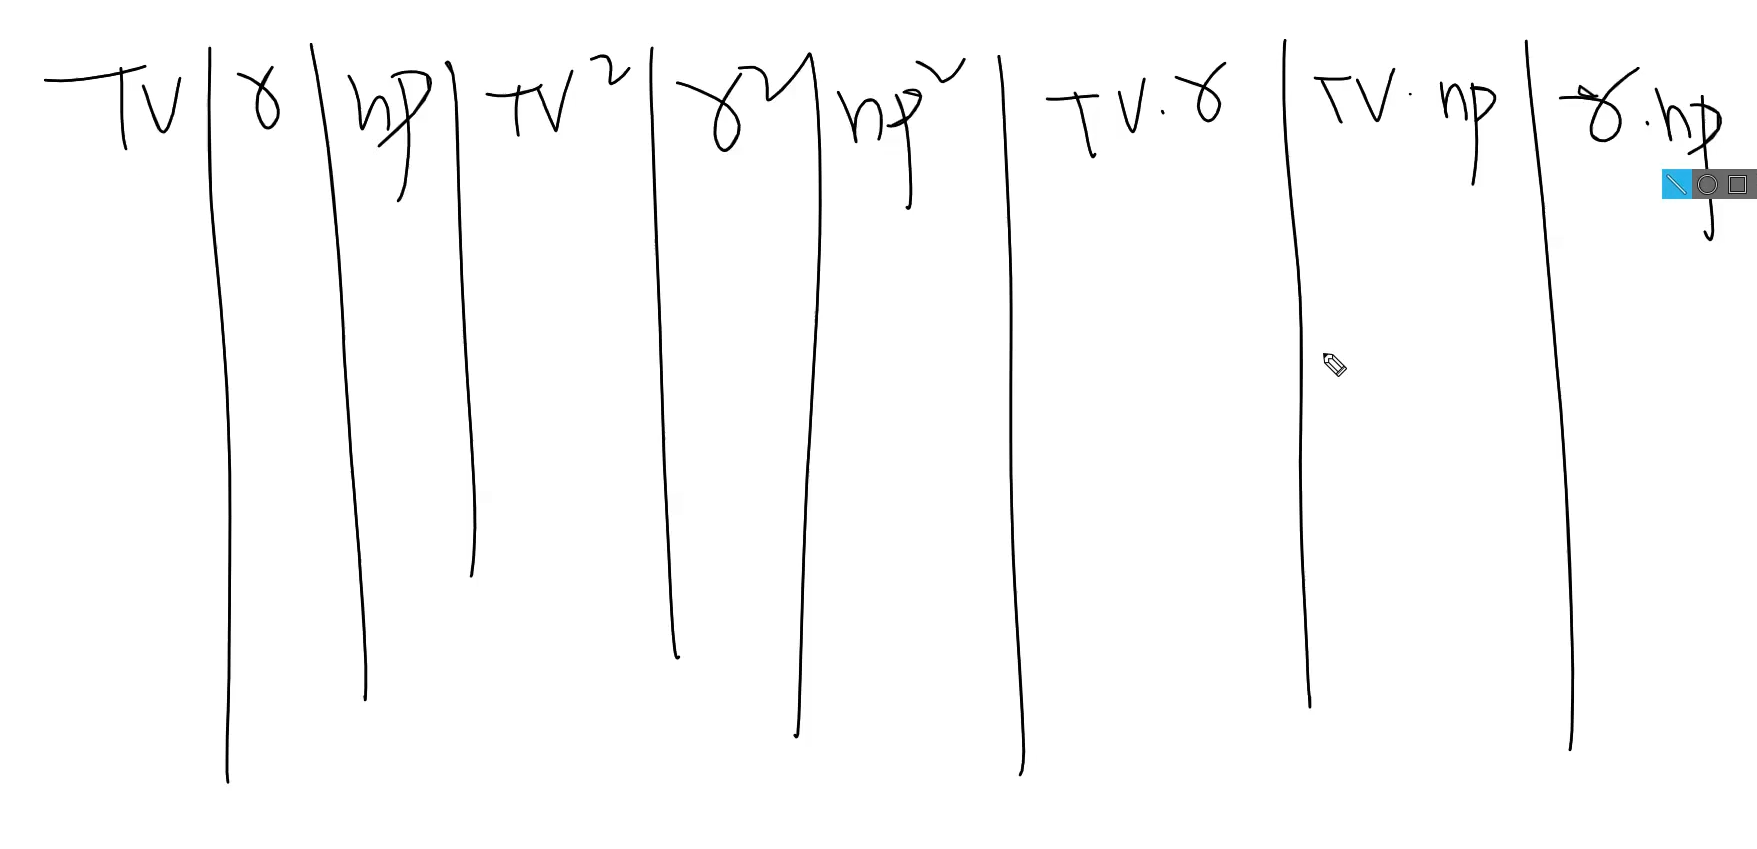

In [80]:
#Increasing to higher degree
from sklearn. preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = pd. DataFrame(polynomial_converter. fit_transform(X_train))

In [82]:
#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [84]:
model.coef_

array([ 4.97361575e-02,  3.96785738e-02,  2.33407904e-04, -1.03800633e-07,
        1.03104853e-06, -8.95964701e-09,  1.18811903e-07, -2.85278061e-08,
        4.59336554e-08])

In [86]:
ypred_train = model.predict(X_train_poly)

from sklearn.metrics import mean_squared_error,r2_score
print("Train R2:",r2_score(y_train,ypred_train))

Train R2: 0.9893215378017587


In [88]:
#data preprocessing on test data
X_test_poly = pd. DataFrame(polynomial_converter.transform(X_test))

#prediction on test data
ypred_test = model.predict(X_test_poly)

#evaluation on test data
print("Test R2:",r2_score(y_test,ypred_test))

Test R2: 0.9769706289034074


In [93]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=1, include_bias=False)               # Try with different degree like 1,2,3,4 and observe
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train) )

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

#prediction on train data
ypred_train = model.predict(X_train_poly)

#Evaluation on train data
from sklearn.metrics import mean_squared_error, r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross Validation on train data
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(model,X_train_poly,y_train,cv=5).mean())

#data preprocessing on test data
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

#prediction on test Data
ypred_test = model.predict(X_test_poly)

#evaluation on test data
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.9209087553499528
Cross Validation Score: 0.9157327701186169
Test R2: 0.8353672324670594


In [95]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)               # Try with different degree like 1,2,3,4 and observe
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train) )

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

#prediction on train data
ypred_train = model.predict(X_train_poly)

#Evaluation on train data
from sklearn.metrics import mean_squared_error, r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross Validation on train data
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(model,X_train_poly,y_train,cv=5).mean())

#data preprocessing on test data
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

#prediction on test Data
ypred_test = model.predict(X_test_poly)

#evaluation on test data
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.9893215378017587
Cross Validation Score: 0.9865047119212675
Test R2: 0.9769706289034074


- **For Degree 3**  --> 19 columns
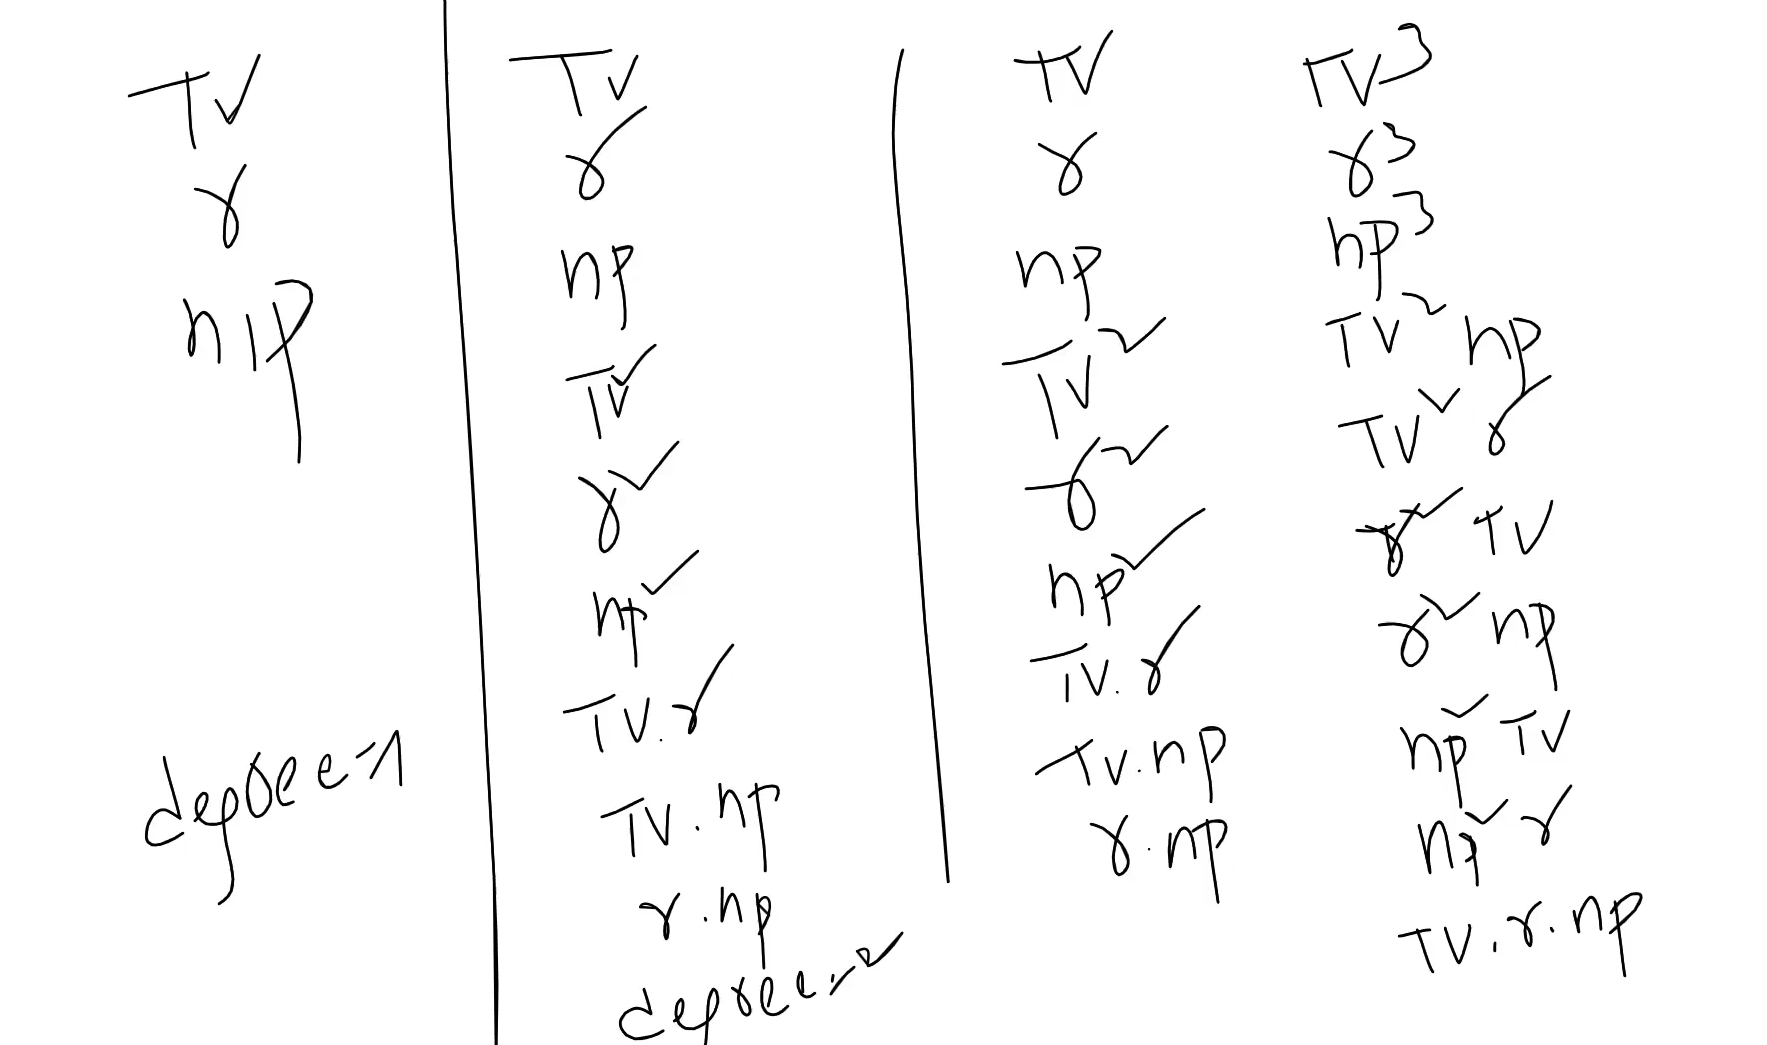

In [126]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)               # Try with different degree like 1,2,3,4 and observe
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train) )

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

#prediction on train data
ypred_train = model.predict(X_train_poly)

#Evaluation on train data
from sklearn.metrics import mean_squared_error, r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross Validation on train data
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(model,X_train_poly,y_train,cv=5).mean())

#data preprocessing on test data
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

#prediction on test Data
ypred_test = model.predict(X_test_poly)

#evaluation on test data
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.9943125673361868
Cross Validation Score: 0.9889701597140051
Test R2: 0.9834265228421665


In [107]:
model.coef_

array([ 8.98956779e-02,  6.41047344e-02,  4.90337055e-03, -4.25032525e-07,
        9.98437372e-07, -8.90735930e-08, -5.10184072e-07, -5.19756321e-07,
        3.33068405e-07,  7.17614447e-13, -1.46470977e-13,  3.36818329e-13,
        7.77627065e-13,  2.48677845e-13, -5.34836439e-13,  7.72722037e-12,
       -6.10008232e-13,  4.49075042e-12, -2.73792914e-12])

In [122]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=4, include_bias=False)               # Try with different degree like 1,2,3,4 and observe
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train) )

#Modelling on train data
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

#prediction on train data
ypred_train = model.predict(X_train_poly)

#Evaluation on train data
from sklearn.metrics import mean_squared_error, r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#Cross Validation on train data
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(model,X_train_poly,y_train,cv=5).mean())

#data preprocessing on test data
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

#prediction on test Data
ypred_test = model.predict(X_test_poly)

#evaluation on test data
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.7886455560213025
Cross Validation Score: 0.6475787556281082
Test R2: 0.6839380105992799


- **So we got highest accuracy with degree 3**

# **Future Data**

In [111]:
df1 = pd.DataFrame({"TV":[150000], "radio":[5000],"newspaper":[10000]})
df1

,TV,radio,newspaper
0,150000,5000,10000


In [113]:
model.predict(df1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 19 features as input.

- **It will give error as it is expecting 19 features**

In [128]:
# Before doing this run with degree 3
#data preprocessing on test data
df1_poly = pd. DataFrame(polynomial_converter.transform(df1))
df1_poly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,150000.0,5000.0,10000.0,2.250000e+10,750000000.0,1.500000e+09,25000000.0,50000000.0,100000000.0,3.375000e+15,1.125000e+14,2.250000e+14,3.750000e+12,7.500000e+12,1.500000e+13,1.250000e+11,2.500000e+11,5.000000e+11,1.000000e+12


In [130]:
model.predict(df1_poly)

array([11177.5232549])

**Comparison with Linear Regression**

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

- Multiple Linear Regression:

  - R2: 0.92
  
- Polynomial 2-degree:
  
  - R2: 0.98